<a href="https://colab.research.google.com/github/FelipeFerAl/SignalProcessing/blob/main/TareaFiltros(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 1: FILTRADO

# Librerías y Funciones

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, butter, lfilter
from ipywidgets import interact

In [2]:
#@title Funciones
def señal(frequencies, sample):
  A = 1
  time = np.linspace(0, 1, sample)
  total_signal = np.zeros(sample)
  for freq in frequencies:
    signal = A * np.sin(2 * np.pi * freq * time)
    total_signal = signal+total_signal
  total_signal = total_signal + np.random.normal(0, 0.3, sample)
  return time, total_signal

def pulso(freq_vector, frequencies):
  rect_signal = np.where((freq_vector >= frequencies[0]) & (freq_vector <= frequencies[1]), 1, 0)
  rect_signal += np.where((freq_vector <= -frequencies[0]) & (freq_vector >= -frequencies[1]), 1, 0)
  return rect_signal

# Código

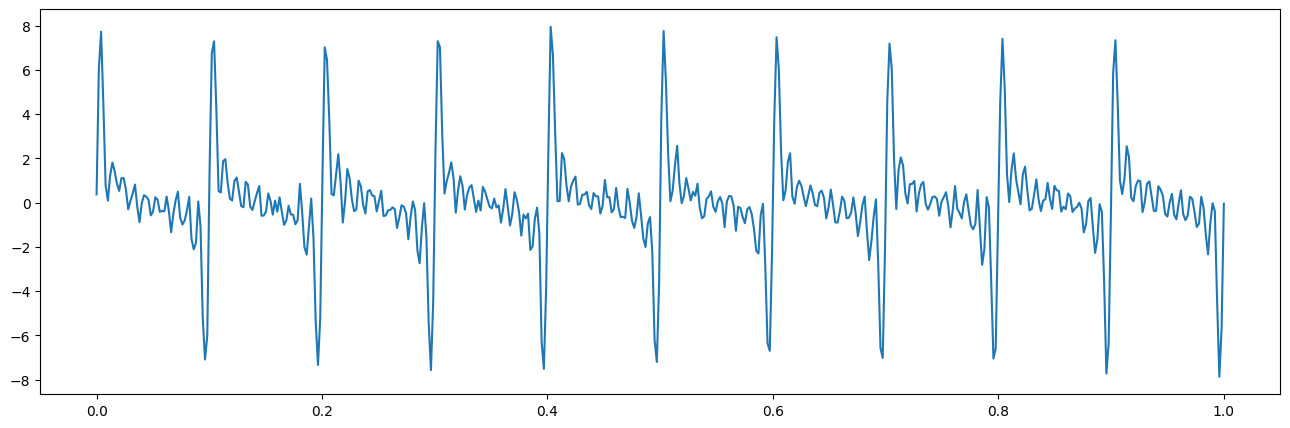

In [3]:
# Señal en el tiempo
time, signal = señal([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 500)

plt.figure(figsize=(16, 5))
plt.plot(time, np.real(signal))
plt.show()

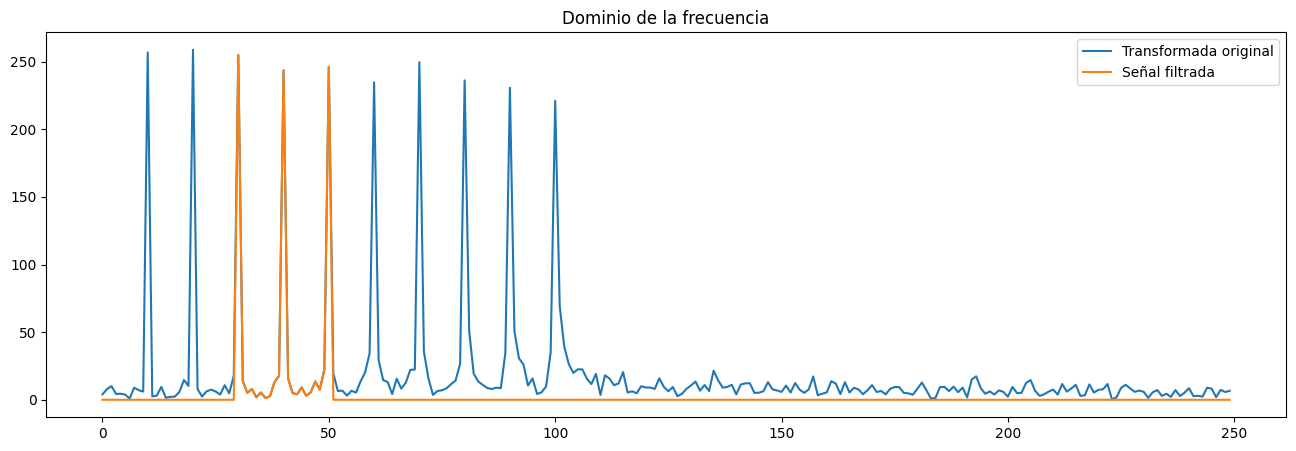

In [4]:
# Transformación de la señal original
trans = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal),1/500)

# Pulso cuadrado para filtrado
rect_filt = pulso(freq, [30,50])
filt_signal = rect_filt * trans

plt.figure(figsize=(16, 5))
plt.plot(freq[:len(freq)//2], np.abs(trans[:len(trans)//2]), label='Transformada original')
plt.plot(freq[:len(freq)//2], np.abs(filt_signal[:len(trans)//2]), label='Señal filtrada')
plt.title('Dominio de la frecuencia')
plt.legend()
plt.show()

In [5]:
# Inversa de la señal filtrada
inverse_signal = np.fft.ifft(filt_signal)

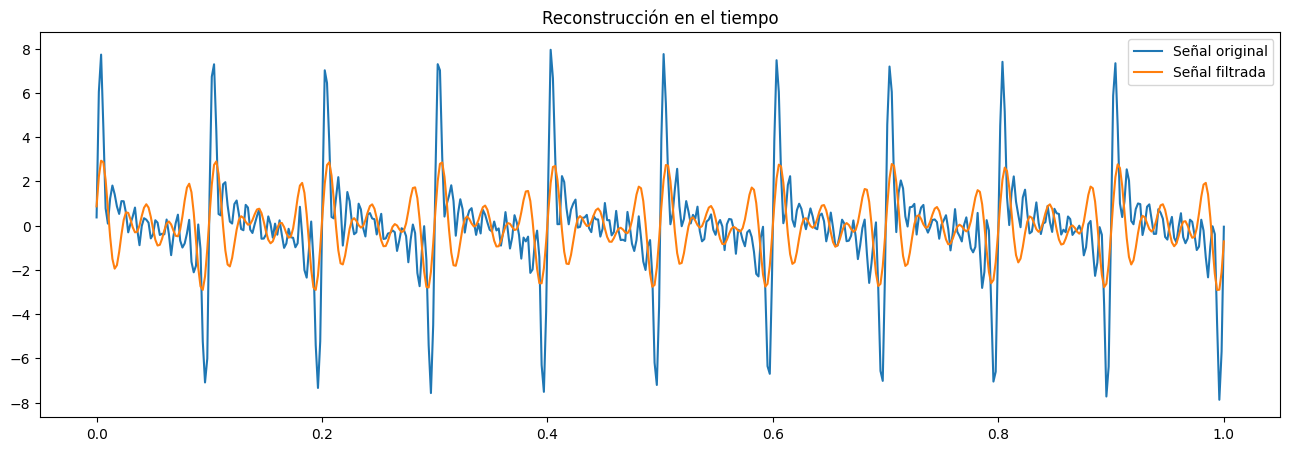

In [6]:
plt.figure(figsize=(16, 5))
plt.plot(time, signal, label='Señal original')
plt.plot(time, np.real(inverse_signal), label='Señal filtrada')
plt.title('Reconstrucción en el tiempo')
plt.legend()
plt.show()

# PARTE 2: EQUALIZADOR

In [14]:
def band_pass_filter(señal, f_low, f_high, fs, order=8):
  nyquist = 0.5 * fs
  f_low = max(f_low, 1)  # Ensure f_low > 0
  f_high = min(f_high, nyquist - 1)  # Ensure f_high < Nyquist
  low = f_low / nyquist
  high = f_high / nyquist
  b, a = butter(order, [low, high], btype='band')
  return lfilter(b, a, señal)

In [15]:
@interact(band1=(-10, 10, 1), band2=(-10, 10, 1),
          band3=(-10, 10, 1), band4=(-10, 10, 1), band5=(-10, 10, 1))

def equalizer(band1=0, band2=0, band3=0, band4=0, band5=0):
  # Frecuencia de muestreo
  fs = 1000

  # Define bands and gains
  bands = [
      (1, 100),
      (100, 200),
      (200, 300),
      (300, 400),
      (400, min(fs / 2 - 1, 500)),
  ]
  gains = [band1, band2, band3, band4, band5]

  # señal ecualizada
  signal_equalized = signal.copy()
  for (f_low, f_high), gain in zip(bands, gains):
      signal_filtered = band_pass_filter(signal, f_low, f_high, fs)
      signal_equalized += (signal_filtered * np.power(10, gain / 20)) - signal_filtered

  # FFT calculation
  W_eq = np.fft.fft(signal_equalized)
  freqs = np.fft.fftfreq(len(W_eq), 1 / fs)

  # Plotting
  plt.figure(figsize=(14, 5))

  plt.subplot(121)
  plt.plot(time, signal_equalized, label="Señal Ecualizada", color='b')
  plt.xlabel("Tiempo (s)")
  plt.ylabel("Amplitud")
  plt.grid()
  plt.legend()

  plt.subplot(122)
  plt.plot(freqs[:len(freqs)//2], np.abs(W_eq[:len(W_eq)//2]), label="FFT Ecualizada", color='b')
  plt.xlabel("Frecuencia (Hz)")
  plt.ylabel("Amplitud")
  plt.grid()
  plt.xlim(0, fs / 2)
  plt.legend()

  plt.tight_layout()
  plt.show()

interactive(children=(IntSlider(value=0, description='band1', max=10, min=-10), IntSlider(value=0, description…